# Analyzing online job postings in US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading File

In [2]:
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Analyzing percentage of missing values
This is because, at the first look, we can observe a lot of NaN values

In [3]:
(df.isnull().sum()/df.shape[0])*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

**department and salary_range has more than 50% missing values and job_id is not required, because it'll have all unique values , so we will drop them.**

In [4]:
df.drop(columns=['department', 'salary_range', 'job_id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   company_profile      14572 non-null  object
 3   description          17879 non-null  object
 4   requirements         15185 non-null  object
 5   benefits             10670 non-null  object
 6   telecommuting        17880 non-null  int64 
 7   has_company_logo     17880 non-null  int64 
 8   has_questions        17880 non-null  int64 
 9   employment_type      14409 non-null  object
 10  required_experience  10830 non-null  object
 11  required_education   9775 non-null   object
 12  industry             12977 non-null  object
 13  function             11425 non-null  object
 14  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.0+ MB


In [5]:
df['location'].value_counts()

GB, LND, London            718
US, NY, New York           658
US, CA, San Francisco      472
GR, I, Athens              464
US, ,                      339
                          ... 
US, KS, Overland park        1
BR, RJ, Rio de Janeiro       1
NZ, N, Auckland/Penrose      1
GB, NGM, Nottingham          1
US, MA, New England          1
Name: location, Length: 3105, dtype: int64

In [6]:
df.drop(index = df[df['location'].isnull()].index, inplace=True)

# EDA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17534 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17534 non-null  object
 1   location             17534 non-null  object
 2   company_profile      14288 non-null  object
 3   description          17533 non-null  object
 4   requirements         15015 non-null  object
 5   benefits             10574 non-null  object
 6   telecommuting        17534 non-null  int64 
 7   has_company_logo     17534 non-null  int64 
 8   has_questions        17534 non-null  int64 
 9   employment_type      14277 non-null  object
 10  required_experience  10737 non-null  object
 11  required_education   9713 non-null   object
 12  industry             12879 non-null  object
 13  function             11341 non-null  object
 14  fraudulent           17534 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.1+ MB


### Extracting state and city from the location for analysis

In [8]:
loc_split =[]

for loc in df['location']:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)

loc_split = loc_split[[0, 1, 2]]

loc_split = loc_split.rename(columns={0:"country", 1: "state", 2:'city'})

In [9]:
df = df.join(loc_split)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df = df[df['city'].notna() & df['state'].notna() & df['country'].notna()]

In [12]:
df['city_state_country'] = df['city'] + ", " + df['state'] + ", " + df['country']

In [13]:
df.shape

(17105, 19)

In [14]:
## Removing extra spaces, if any
df.city.str.strip()
df.state.str.strip()
df.country.str.strip()

0        US
1        NZ
2        US
3        US
4        US
         ..
17191    CA
17192    US
17193    US
17194    NG
17195    NZ
Name: country, Length: 17105, dtype: object

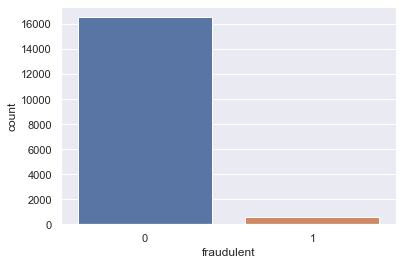

Number of fraudulent jobs:  554
Number of real jobs:  16551
Percentage of Fake Jobs:  3.35 %


In [15]:
sns.countplot(x = 'fraudulent', data = df)
plt.show()
print("Number of fraudulent jobs: ", df['fraudulent'].sum())
print("Number of real jobs: ", df.shape[0]-df['fraudulent'].sum())
print("Percentage of Fake Jobs: ", round((df['fraudulent'].sum()*100)/(df.shape[0]-df['fraudulent'].sum()), 2), "%")

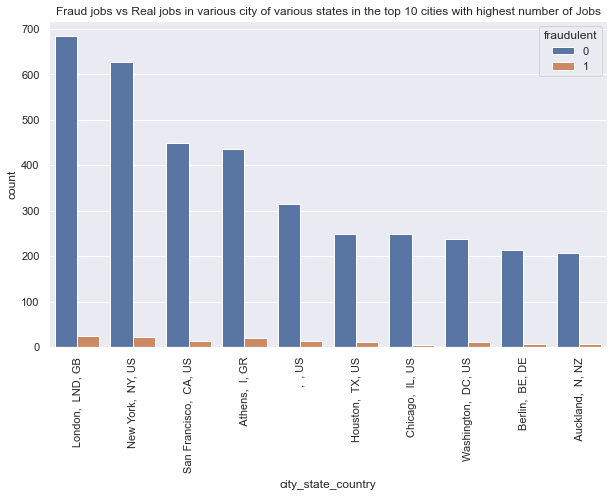

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='city_state_country', data=df, hue="fraudulent", order=df['city_state_country'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Fraud jobs vs Real jobs in various city of various states in the top 10 cities with highest number of Jobs')
plt.show()

In [17]:
def count_plot(feature):  
    plt.figure(figsize=(8,5))
    sns.countplot(x=feature, data=df, hue="fraudulent", order=df[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + 'vs fake job count'
    plt.title(title)
    plt.show()

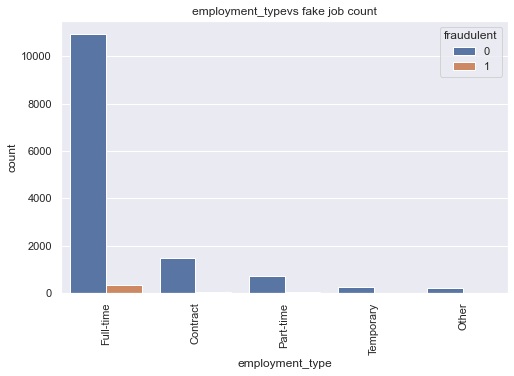

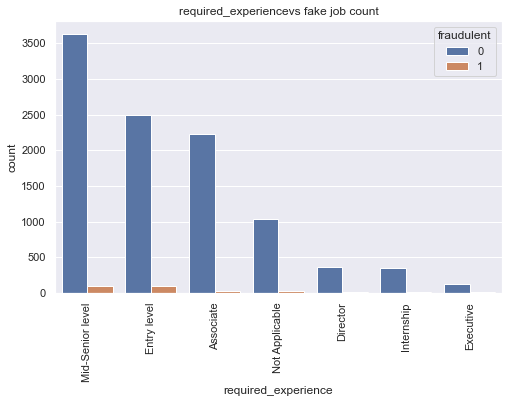

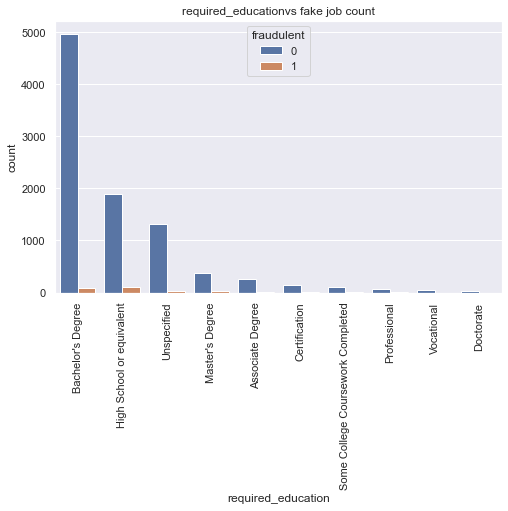

In [18]:
count_plot('employment_type')

count_plot('required_experience')

count_plot('required_education')

**The graphs above show that most fraudulent jobs belong to the full-time category and usually for entry-level positions requiring a bachelor’s degree or high school education.**

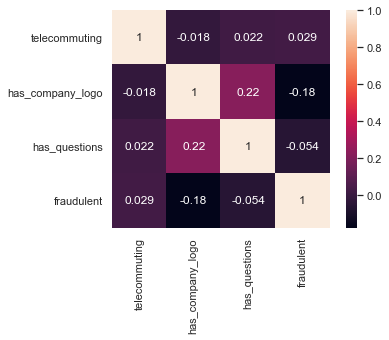

In [19]:
sns.heatmap(data = df.corr(), annot=True, square= True)
plt.show()

Some amount of negative correlation is there between fraudulent and has_company_logo that implies that companies without logo are at higher chances to turn out to be fraudulent

# Handling text data

### Combining all the text columns into one

In [20]:
df.fillna(" ",inplace = True)

df['text'] =  df['title'] + ' ' + df['location'] + ' ' + df['company_profile'] + ' ' + \
df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + \
df['required_experience'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']


df.drop(['title','location','company_profile', 'description','requirements','benefits','employment_type','required_experience',
                           'required_education','industry','function', 'city', 'city_state_country', 'has_company_logo', 
                           'has_questions', 'state', 'country'], axis = 1, inplace = True)

In [21]:
df.head()

,telecommuting,fraudulent,text
0,0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [36]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Abdullah Jamil
[nltk_data]     Ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [39]:
WNLem = WordNetLemmatizer()

corpus = []

for t in df['text']:
    clean_t = re.sub('[^a-zA-Z]', ' ', t)
    clean_t = clean_t.lower()
    clean_t = clean_t.split()
    clean_t = [WNLem.lemmatize(word) for word in clean_t if not word in stopwords.words('english')]
    clean_t = ' '.join(clean_t)
    corpus.append(clean_t)

In [40]:
corpus[0]

'marketing intern u ny new york food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content manageme

In [49]:
c = {'text': corpus}
c = pd.DataFrame(c)
c = c.join(df['fraudulent'])

In [50]:
c.to_csv('corpus.csv', index=False)